<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Environment setup

Package Installations:
- Conda (Miniconda)  
- Pytorch  
- fastai  

```
pip install spacy=3.7.2
pip install torch torchvision torchaudio
pip install fastai
```

In [ ]:
#| eval: false
from fastai.vision.all import *

## Imagenette data

In [ ]:
#| eval: false
path = untar_data(URLs.IMAGENETTE_320, data=Path.cwd()/'data')
path.ls()

(#4) [Path('/home/jetson/jetson-examples/fastai/data/imagenette2-320/train'),Path('/home/jetson/jetson-examples/fastai/data/imagenette2-320/models'),Path('/home/jetson/jetson-examples/fastai/data/imagenette2-320/noisy_imagenette.csv'),Path('/home/jetson/jetson-examples/fastai/data/imagenette2-320/val')]

In [ ]:
#| eval: false
train_files = get_image_files(path/'train')
val_files = get_image_files(path/'val')

print(f"Training set size: {len(train_files)}")
print(f"Validation set size: {len(val_files)}")

Training set size: 9469
Validation set size: 3925


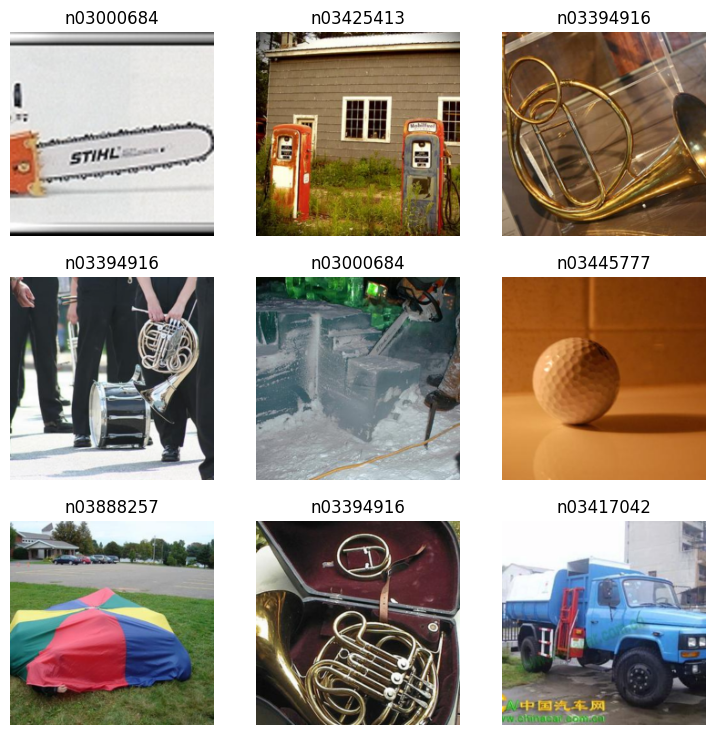

In [ ]:
#| eval: false
dls = ImageDataLoaders.from_folder(path, valid='val', item_tfms=Resize(224), batch_tfms=Normalize.from_stats(*imagenet_stats),)
dls.show_batch()

## Train Resnet18

In [ ]:
#| eval: false
learn = vision_learner(dls, resnet18, metrics=accuracy, pretrained=True)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.244745,0.055612,0.983694,23:58


epoch,train_loss,valid_loss,accuracy,time
0,0.092294,0.052519,0.983440,35:21


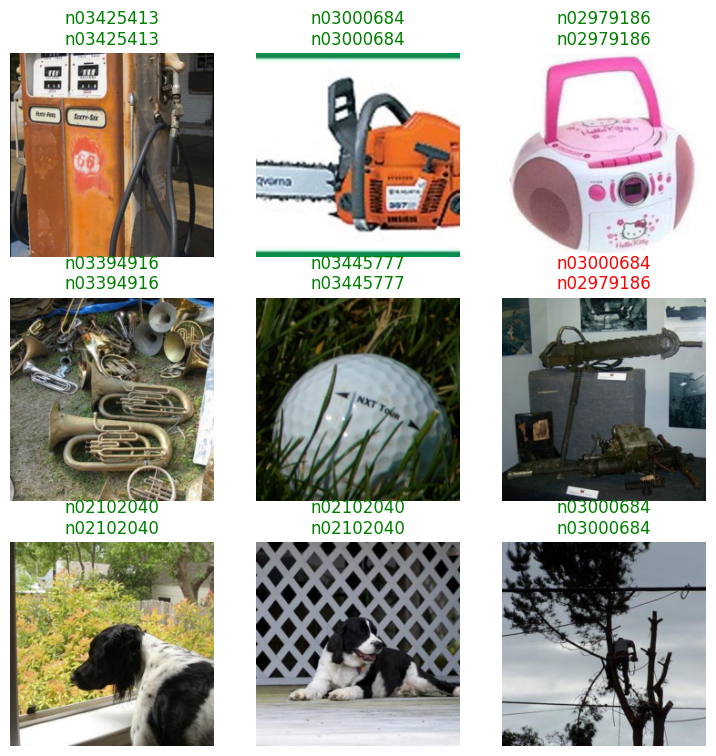

In [ ]:
#| eval: false
learn.show_results()

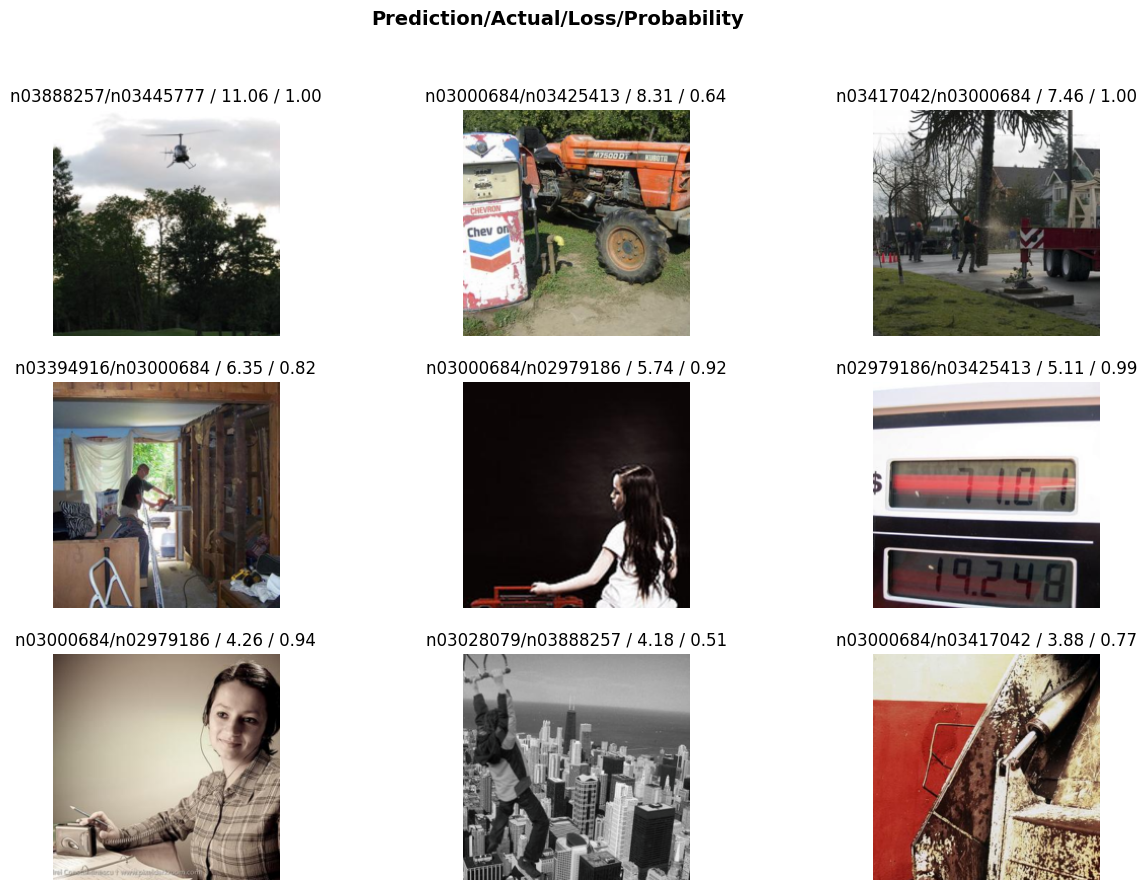

In [ ]:
#| eval: false
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

## Inference

/home/jetson/jetson-examples/fastai/data/imagenette2-320/train/n03425413/n03425413_15398.JPEG


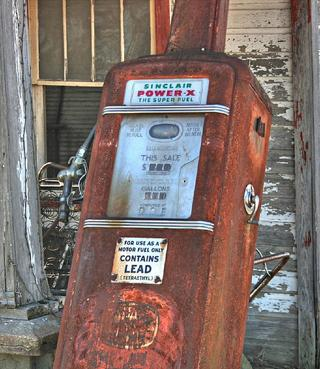

In [ ]:
#| eval: false
print(train_files[0])
Image.open(train_files[0])

In [ ]:
#| eval: false
learn.predict(train_files[0])

('n03425413',
 tensor(7),
 tensor([3.0654e-09, 4.5979e-08, 1.5093e-09, 1.6188e-06, 1.7752e-09, 1.1125e-09,
         2.2748e-10, 1.0000e+00, 3.5632e-11, 2.6704e-11]))

In [ ]:
#| eval: false
learn.path = Path.cwd() / 'models'
learn.export(fname='model.pkl')

In [ ]:
#| eval: false
exported_learn = load_learner(fname=Path.cwd() / 'models' / 'model.pkl')
exported_learn.predict(train_files[0])

('n03425413',
 tensor(7),
 tensor([3.0654e-09, 4.5979e-08, 1.5093e-09, 1.6188e-06, 1.7752e-09, 1.1125e-09,
         2.2748e-10, 1.0000e+00, 3.5632e-11, 2.6704e-11]))